In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
data.shape

(7043, 21)

In [7]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [8]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
pd.set_option('display.max_rows',300)

In [10]:
data.duplicated().sum()

np.int64(0)

In [11]:
data['TotalCharges'].dtype

dtype('O')

In [12]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors='coerce')

In [13]:
data['TotalCharges'].isnull().sum()

np.int64(11)

In [14]:
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())

In [15]:
data['TotalCharges']

,TotalCharges
0,29.85
1,1889.50
2,108.15
3,1840.75
4,151.65
...,...
7038,1990.50
7039,7362.90
7040,346.45
7041,306.60


In [16]:
data['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [17]:
churn_rate = data['Churn'].value_counts(normalize=True)*100
churn_rate

,proportion
Churn,
No,73.463013
Yes,26.536987


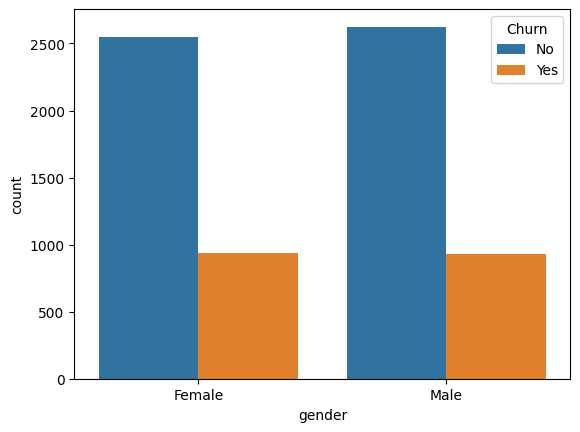

In [18]:
sns.countplot(data=data,x='gender',hue='Churn')
plt.show()

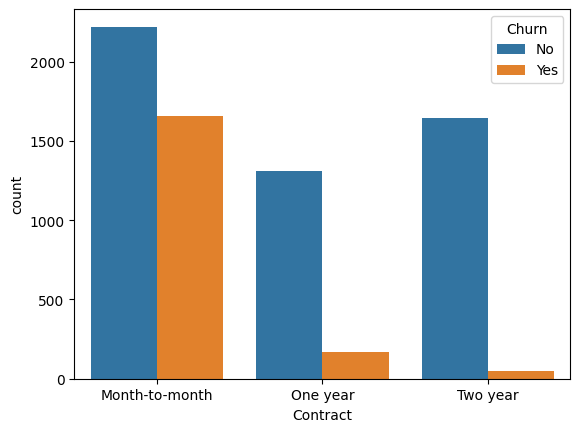

In [19]:
sns.countplot(data=data,x='Contract',hue='Churn')
plt.show()

From the above graph, Month-to-Month Contract Customers are the one with highest Churn Count than both One year and Two Year Contract Customers.

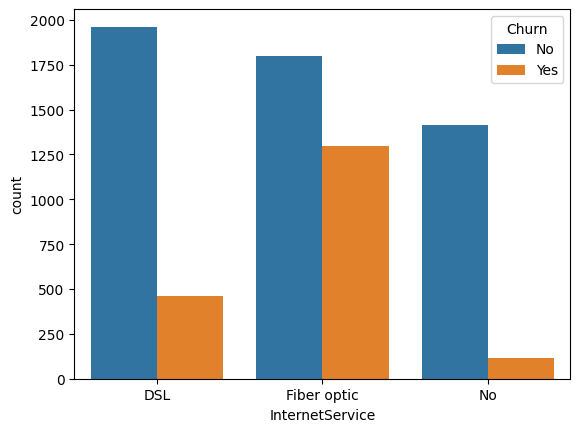

In [20]:
sns.countplot(data=data,x='InternetService',hue='Churn')
plt.show()

No Internet has lowest Churn Count whereas Fiber Optic Users got highest Churn Count than DSL and No Internet.

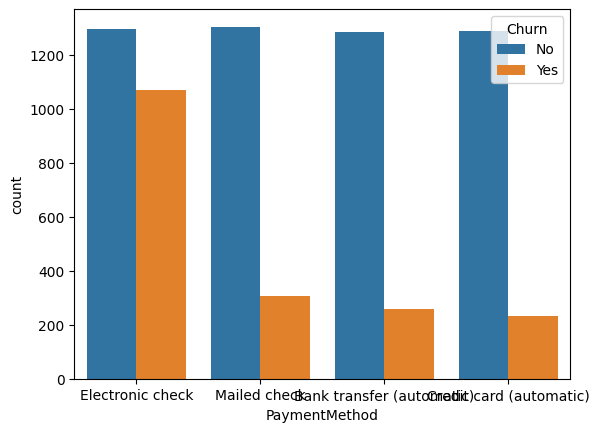

In [21]:
sns.countplot(x='PaymentMethod',hue='Churn',data=data)
plt.show()

Credit Card Users got lowest Churn Count whereas Electronic Check Users got Highest Churn Count

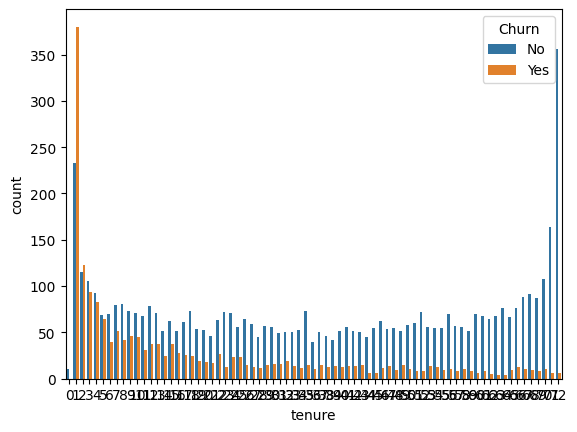

In [22]:
sns.countplot(data=data,x='tenure',hue='Churn')
plt.show()

The Churn Count decreases as Tenure time increases

In [23]:
data['ChargesBin'] = pd.cut(data['MonthlyCharges'],bins= [0,30,60,90,120],labels=['0-30','31-60','61-90','91-120'])

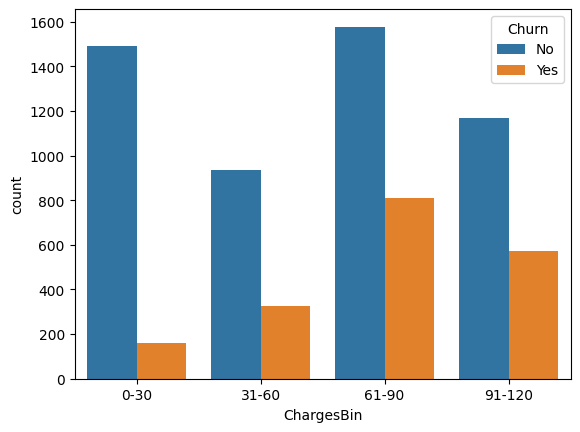

In [24]:
sns.countplot(data=data,x='ChargesBin',hue='Churn')
plt.show()

Monthly Charges ranging from 61-90 has highest Churn count but 0-30 has lowest Churn Count

In [25]:
data['ChurnNum'] = data['Churn'].map({'Yes':1,'No':0})

In [26]:
data.groupby('Contract')['ChurnNum'].mean()

,ChurnNum
Contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


From the above observations, Customers under Month-to-Month Contract are at highest Churn Rate and Two Year Contract Customers are at lowest Churn Rate

In [27]:
data.groupby('InternetService')['ChurnNum'].mean()

,ChurnNum
InternetService,
DSL,0.189591
Fiber optic,0.418928
No,0.074050


Users having DSL as Service have highest Churn Rate and No Internet have lowest Churn Rate

In [28]:
data.groupby('ChargesBin')['ChurnNum'].mean()

/tmp/ipython-input-2598867628.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('ChargesBin')['ChurnNum'].mean()


,ChurnNum
ChargesBin,
0-30,0.098004
31-60,0.259289
61-90,0.339061
91-120,0.327775


Customers with Monthly Charges ranging from 61-90 have highest Churn Rate,91-120 have second highest and 0-30 have lowest Churn Rate

In [29]:
data.groupby('tenure')['ChurnNum'].mean()

,ChurnNum
tenure,
0,0.000000
1,0.619902
2,0.516807
3,0.470000
4,0.471591
5,0.481203
6,0.363636
7,0.389313
8,0.341463


In [30]:
data['TenureBins'] = pd.cut(data['tenure'],bins=[0,24,48,72],labels=['0-24','25-48','49-72'])
data['TenureBins']

,TenureBins
0,0-24
1,25-48
2,0-24
3,25-48
4,0-24
...,...
7038,0-24
7039,49-72
7040,0-24
7041,0-24


In [31]:
data.groupby('TenureBins')['ChurnNum'].mean()

/tmp/ipython-input-4164121857.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('TenureBins')['ChurnNum'].mean()


,ChurnNum
TenureBins,
0-24,0.416068
25-48,0.203890
49-72,0.095132


From the above observations, Churn Rate decreases with tenure range

In [32]:
data.groupby('PaymentMethod')['ChurnNum'].mean()

,ChurnNum
PaymentMethod,
Bank transfer (automatic),0.167098
Credit card (automatic),0.152431
Electronic check,0.452854
Mailed check,0.191067


Electronic Check got highest Churn Rate and Credit Card Users got lowest Churn Rate

In [33]:
risky_group = data.groupby(['PaymentMethod','InternetService','TenureBins','Contract'])['ChurnNum'].mean().reset_index()
risky_group

/tmp/ipython-input-3024364884.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  risky_group = data.groupby(['PaymentMethod','InternetService','TenureBins','Contract'])['ChurnNum'].mean().reset_index()


,PaymentMethod,InternetService,TenureBins,Contract,ChurnNum
0,Bank transfer (automatic),DSL,0-24,Month-to-month,0.237288
1,Bank transfer (automatic),DSL,0-24,One year,0.173913
2,Bank transfer (automatic),DSL,0-24,Two year,0.000000
3,Bank transfer (automatic),DSL,25-48,Month-to-month,0.157895
4,Bank transfer (automatic),DSL,25-48,One year,0.056604
5,Bank transfer (automatic),DSL,25-48,Two year,0.000000
6,Bank transfer (automatic),DSL,49-72,Month-to-month,0.090909
7,Bank transfer (automatic),DSL,49-72,One year,0.057971
8,Bank transfer (automatic),DSL,49-72,Two year,0.015075
9,Bank transfer (automatic),Fiber optic,0-24,Month-to-month,0.594937


In [34]:
risky_group.sort_values(by='ChurnNum',ascending=False).head(5)

,PaymentMethod,InternetService,TenureBins,Contract,ChurnNum
105,Mailed check,No,49-72,Month-to-month,1.000000
63,Electronic check,Fiber optic,0-24,Month-to-month,0.676072
9,Bank transfer (automatic),Fiber optic,0-24,Month-to-month,0.594937
90,Mailed check,Fiber optic,0-24,Month-to-month,0.568750
36,Credit card (automatic),Fiber optic,0-24,Month-to-month,0.540146


In [35]:
risky_group.sort_values(by='ChurnNum',ascending=False).tail(5)

,PaymentMethod,InternetService,TenureBins,Contract,ChurnNum
11,Bank transfer (automatic),Fiber optic,0-24,Two year,NaN
24,Bank transfer (automatic),No,49-72,Month-to-month,NaN
38,Credit card (automatic),Fiber optic,0-24,Two year,NaN
78,Electronic check,No,49-72,Month-to-month,NaN
92,Mailed check,Fiber optic,0-24,Two year,NaN


In [36]:
risky_group.dropna(inplace=True)
risky_group.shape

(103, 5)

In [37]:
risky_group.sort_values(by='ChurnNum',ascending=False).tail(5)

,PaymentMethod,InternetService,TenureBins,Contract,ChurnNum
96,Mailed check,Fiber optic,49-72,Month-to-month,0.0
98,Mailed check,Fiber optic,49-72,Two year,0.0
101,Mailed check,No,0-24,Two year,0.0
103,Mailed check,No,25-48,One year,0.0
106,Mailed check,No,49-72,One year,0.0


In [37]:
count = data.groupby(['PaymentMethod','InternetService','TenureBins','Contract']).size().reset_index(name='Count')
count

/tmp/ipython-input-2784848500.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count = data.groupby(['PaymentMethod','InternetService','TenureBins','Contract']).size().reset_index(name='Count')


,PaymentMethod,InternetService,TenureBins,Contract,Count
0,Bank transfer (automatic),DSL,0-24,Month-to-month,118
1,Bank transfer (automatic),DSL,0-24,One year,23
2,Bank transfer (automatic),DSL,0-24,Two year,5
3,Bank transfer (automatic),DSL,25-48,Month-to-month,57
4,Bank transfer (automatic),DSL,25-48,One year,53
5,Bank transfer (automatic),DSL,25-48,Two year,18
6,Bank transfer (automatic),DSL,49-72,Month-to-month,22
7,Bank transfer (automatic),DSL,49-72,One year,69
8,Bank transfer (automatic),DSL,49-72,Two year,199
9,Bank transfer (automatic),Fiber optic,0-24,Month-to-month,158


In [38]:
risky_group = risky_group.merge(count,on=['PaymentMethod','InternetService','TenureBins','Contract'])
risky_group

,PaymentMethod,InternetService,TenureBins,Contract,ChurnNum,Count
0,Bank transfer (automatic),DSL,0-24,Month-to-month,0.237288,118
1,Bank transfer (automatic),DSL,0-24,One year,0.173913,23
2,Bank transfer (automatic),DSL,0-24,Two year,0.000000,5
3,Bank transfer (automatic),DSL,25-48,Month-to-month,0.157895,57
4,Bank transfer (automatic),DSL,25-48,One year,0.056604,53
5,Bank transfer (automatic),DSL,25-48,Two year,0.000000,18
6,Bank transfer (automatic),DSL,49-72,Month-to-month,0.090909,22
7,Bank transfer (automatic),DSL,49-72,One year,0.057971,69
8,Bank transfer (automatic),DSL,49-72,Two year,0.015075,199
9,Bank transfer (automatic),Fiber optic,0-24,Month-to-month,0.594937,158


In [39]:
risky_group = risky_group[risky_group['Count'] > 30]
risky_group

,PaymentMethod,InternetService,TenureBins,Contract,ChurnNum,Count
0,Bank transfer (automatic),DSL,0-24,Month-to-month,0.237288,118
3,Bank transfer (automatic),DSL,25-48,Month-to-month,0.157895,57
4,Bank transfer (automatic),DSL,25-48,One year,0.056604,53
7,Bank transfer (automatic),DSL,49-72,One year,0.057971,69
8,Bank transfer (automatic),DSL,49-72,Two year,0.015075,199
9,Bank transfer (automatic),Fiber optic,0-24,Month-to-month,0.594937,158
11,Bank transfer (automatic),Fiber optic,25-48,Month-to-month,0.411765,102
12,Bank transfer (automatic),Fiber optic,25-48,One year,0.080000,50
14,Bank transfer (automatic),Fiber optic,49-72,Month-to-month,0.194030,67
15,Bank transfer (automatic),Fiber optic,49-72,One year,0.168317,101


In [40]:
risky_group.sort_values(by='ChurnNum',ascending=False).head()

,PaymentMethod,InternetService,TenureBins,Contract,ChurnNum,Count
60,Electronic check,Fiber optic,0-24,Month-to-month,0.676072,886
9,Bank transfer (automatic),Fiber optic,0-24,Month-to-month,0.594937,158
86,Mailed check,Fiber optic,0-24,Month-to-month,0.568750,160
34,Credit card (automatic),Fiber optic,0-24,Month-to-month,0.540146,137
63,Electronic check,Fiber optic,25-48,Month-to-month,0.489510,286


In [41]:
risky_group.sort_values(by='ChurnNum',ascending=True).head()

,PaymentMethod,InternetService,TenureBins,Contract,ChurnNum,Count
22,Bank transfer (automatic),No,25-48,Two year,0.000000,35
98,Mailed check,No,25-48,One year,0.000000,46
96,Mailed check,No,0-24,Two year,0.000000,71
85,Mailed check,DSL,49-72,Two year,0.000000,61
24,Bank transfer (automatic),No,49-72,Two year,0.007752,129


In [42]:
most_risky = risky_group.sort_values(by='ChurnNum',ascending=False).head(5)
most_risky

,PaymentMethod,InternetService,TenureBins,Contract,ChurnNum,Count
60,Electronic check,Fiber optic,0-24,Month-to-month,0.676072,886
9,Bank transfer (automatic),Fiber optic,0-24,Month-to-month,0.594937,158
86,Mailed check,Fiber optic,0-24,Month-to-month,0.568750,160
34,Credit card (automatic),Fiber optic,0-24,Month-to-month,0.540146,137
63,Electronic check,Fiber optic,25-48,Month-to-month,0.489510,286


In [43]:
least_risky = risky_group.sort_values(by='ChurnNum',ascending=True).head(5)
least_risky

,PaymentMethod,InternetService,TenureBins,Contract,ChurnNum,Count
22,Bank transfer (automatic),No,25-48,Two year,0.000000,35
98,Mailed check,No,25-48,One year,0.000000,46
96,Mailed check,No,0-24,Two year,0.000000,71
85,Mailed check,DSL,49-72,Two year,0.000000,61
24,Bank transfer (automatic),No,49-72,Two year,0.007752,129


<Axes: xlabel='Contract', ylabel='ChurnNum'>

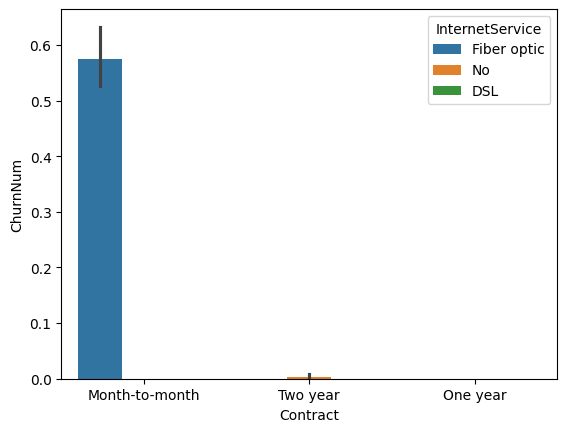

In [44]:
combinedata = pd.concat([most_risky,least_risky])
sns.barplot(data=combinedata,x='Contract',y='ChurnNum',hue='InternetService')

<Axes: xlabel='Contract', ylabel='ChurnNum'>

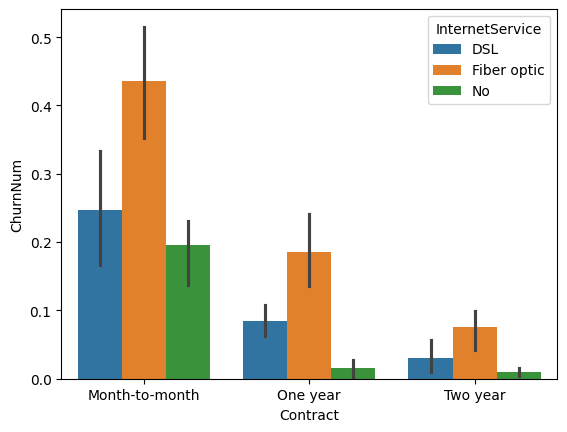

In [45]:
sns.barplot(data=risky_group,x='Contract',y='ChurnNum',hue='InternetService')

From the above barplot, MonthtoMonth Contract Customers got highest Churn Rate along with Fibre Optic. Two year Contract Customers got Lowest Churn Rate along with No Internet Service

<Axes: xlabel='TenureBins', ylabel='ChurnNum'>

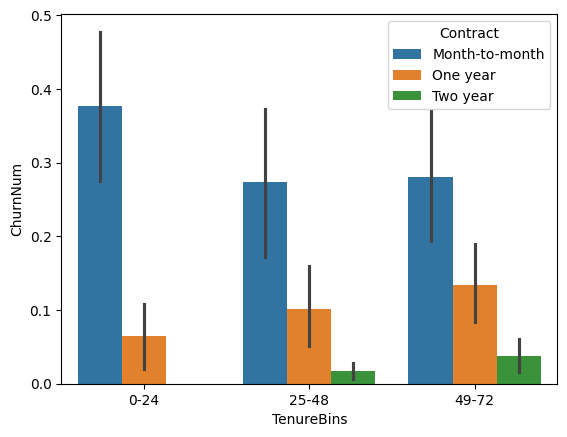

In [46]:
sns.barplot(data=risky_group,x='TenureBins',y='ChurnNum',hue='Contract')

From the above barplot,MonthtoMonth Contract Customers having tenure ranging from 0-24 have highest Churn Rate and Two Year Contract customers having tenure ranging from 25-48 have the lowest Churn Rate

<Axes: xlabel='TenureBins', ylabel='ChurnNum'>

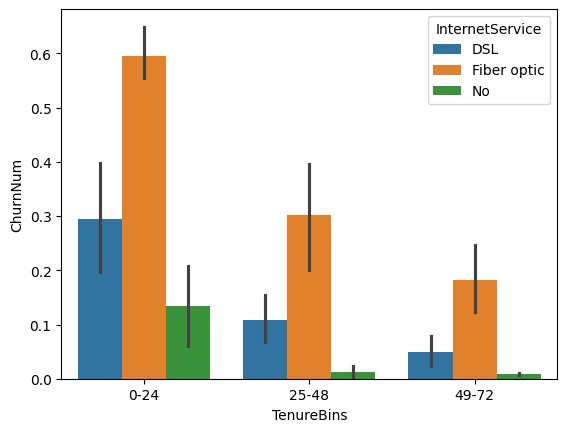

In [47]:
sns.barplot(data=risky_group,x='TenureBins',y='ChurnNum',hue='InternetService')

<Axes: xlabel='PaymentMethod', ylabel='ChurnNum'>

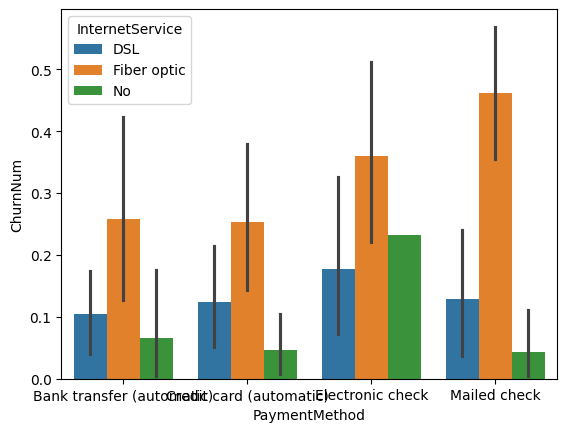

In [48]:
sns.barplot(data=risky_group,x='PaymentMethod',y='ChurnNum',hue='InternetService')

Customer paying using Mailed Check using Fibre Optic Service has highest Churn Rate and Customers paying using Credit Card using No internet Service have the lowest Churn Rate

<Axes: xlabel='PaymentMethod', ylabel='ChurnNum'>

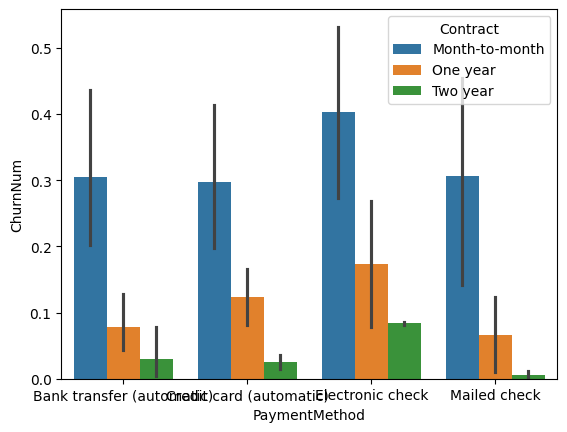

In [49]:
sns.barplot(data=risky_group,x='PaymentMethod',y='ChurnNum',hue='Contract')

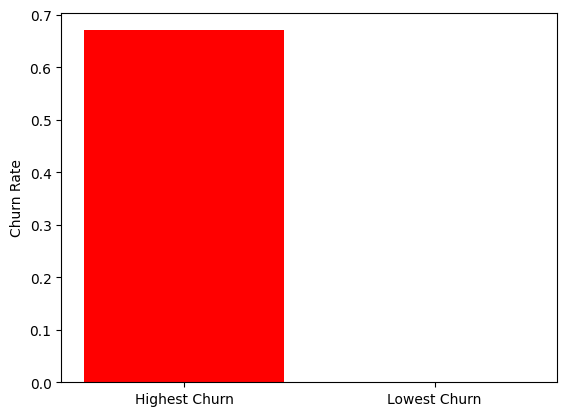

In [50]:
plt.bar(['Highest Churn','Lowest Churn'],[0.67,0.00],color=['red','green'])
plt.ylabel('Churn Rate')
plt.show()

<Axes: xlabel='PaymentMethod', ylabel='ChurnNum'>

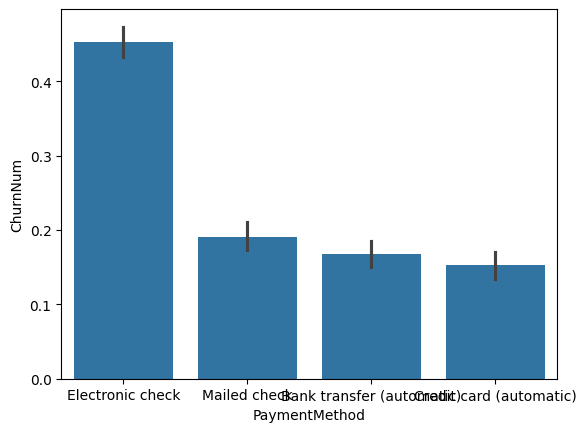

In [51]:
sns.barplot(data=data,x='PaymentMethod',y='ChurnNum')

In [52]:
High_Risk = risky_group[(risky_group['InternetService']== 'Fiber optic') & (risky_group['Contract']=='Month-to-month') & (risky_group['PaymentMethod'] == 'Mailed check') & (risky_group['TenureBins'] =='0-24')]
High_Risk

,PaymentMethod,InternetService,TenureBins,Contract,ChurnNum,Count
86,Mailed check,Fiber optic,0-24,Month-to-month,0.56875,160


There are total 160 Customers with Highest Churn Risk

In [53]:
Least_Risk = risky_group[(risky_group['InternetService']== 'No') & (risky_group['Contract']=='Two year') & (risky_group['PaymentMethod'] == 'Credit card (automatic)')]
Least_Risk

,PaymentMethod,InternetService,TenureBins,Contract,ChurnNum,Count
47,Credit card (automatic),No,25-48,Two year,0.025000,40
50,Credit card (automatic),No,49-72,Two year,0.007874,127


There are total 40+127 = 167 Customers with lowest Churn Risk

In [54]:
overall_churn = risky_group['ChurnNum'].mean()
high_churn = High_Risk['ChurnNum'].mean()
low_churn = Least_Risk['ChurnNum'].mean()

In [55]:
print("Overall Churn",overall_churn)
print("High Churn",high_churn)
print("Least Churn",low_churn)

Overall Churn 0.1789451357239231
High Churn 0.56875
Least Churn 0.01643700787401575


From the above observations,we see that High Churn Group are more than overall Churn Rate.

In [58]:
def assign(rows):
  if (rows['InternetService'] == "Fiber optic") and (rows['Contract'] == 'Month-to-month') and (rows['PaymentMethod']=='Mailed check') and (rows['TenureBins'] =='0-24'):
    return 'High'
  elif (rows['InternetService']== 'No') and (rows['Contract']=='Two year') and (rows['PaymentMethod'] == 'Credit card (automatic)'):
    return 'Low'
  else:
    return 'Normal'

data['RiskLevel'] = data.apply(assign,axis=1)

In [60]:
data.to_csv("Telco_DataSet_with_Labels.csv",index=False)